![](images/header_03.png)<br>

# Selección de los casos de estudio

El objetivo de la ciencia de datos es desarrollar inteligencia a partir de datos en contextos específicos, por lo cual, es fundamental contar con una variedad de datos, de diferentes tipos y con diferente grado de complejidad, a fin de validar las diferentes técnicas de análisis. Existen diversos repositorios en Internet y bibliotecas en diferentes lenguajes que ofrecen una gran variedad de datos libres, destacándose sitios como el de [Kaggle](https://www.kaggle.com) y el Repositorio de aprendizaje automático y sistemas inteligentes de la Universidad de California en Irvine, [UCI](https://archive.ics.uci.edu/ml/datasets.html).

Para la discusión de temas en las lecciones siguientes se emplearán los conjutos de datos que se describen a continuación. En la presentación de cada caso de estudio, se realiza la primera fase del proceso CRISP-DM, esto es, la comprensión del negocio.

<hr style="border-width: 3px;">

# Conjunto de datos de flores Iris
<br>
<img src="images/iris.jpeg">

## Motivación

El conjunto de datos de flores *Iris* es, posiblemente, la base de datos más popular utilizada en en el área de reconocimiento de patrones. Aunque este conjunto de datos representan un caso de estudio muy simple, es un buen punto de partida para comparar los resultados de los métodos de reconocimiento de patrones con respecto a los estándares de la literatura.

## C1. Comprensión del negocio

El conjunto de datos de flores *Iris* consta de una serie de mediciones de rasgos de flores de tres especies de plantas del género Iris: *Iris setosa*, *Iris virginica* e *Iris versicolor*. 

Las mediciones fueron tomadas en 1935 por Edgar Anderson (una discusión de los aspectos botánicos es presentado por Anderson [aquí](http://biostor.org/reference/11559)) y analizadas por Ronald Fisher. Los resultados de Fisher fueron presentados en el artículo [*The use of multiple measurements in taxonomic problems*](https://doi.org/10.1111/j.1469-1809.1936.tb02137.x), donde discute la utilidad de la técnica de *análisis discriminante lineal* en taxonomía (la revista *The Annals of Human Genetics* publicada por John Wiley & Sons ofrece este artículo en línea por su interés académico, aunque se deslinda de las posturas discriminatorias adoptadas típicamente por los eugenesistas).

<hr style="border-width: 3px;">

# Conjunto de datos de diabetes de los indios Pima


## Motivación

El conjunto de datos [*Pima Indian Diabetes Data Set*](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) se ha convertido en un estándar para el análisis en el desempeño y precisión de métodos de diagnóstico de la diabetes, debido a que es la más amplia sistematización de observaciones de este problema. Este conjunto de datos es un buen punto de inicio para el desarrollo de herramientas de reconocimiento de patrones en problemas de salud.


## C1. Comprensión del negocio

De acuerdo con la Organización Mundial de la Salud, la diabetes es uno de los mayores problems de salud a nivel mundial y una de las 10 principales causas de muerte y discapacidad:

[![](images/diabetes.jpg)](https://www.who.int/en/news-room/fact-sheets/detail/the-top-10-causes-of-death)

De acuerdo con datos del *IDF Diabetes Atlas 8th Edition*, publicado por la *International Diabetes Federation*, para el año 2017 habia, aproximadamente, 425 millones de adultos (20-79 años) que padecían diabetes, número que para el año 2045 se estima que se elevará a 629 millones. Este problema ocasionó gastos de salud superiores a los 727 mil millones de dólares en gastos en 2017 y en la mayoría de los países, este problema sigue en incremento. El desarrollo de herramientas de apoyo al diagnóstico temprano de la diabetes y la evaluación del riesgo de desarrollo de la enfermedad, es un reto para la ciencia de datos.

El conjunto de datos *Pima Indian Diabetes Data Set* reune información de mujeres indígenas proveniente de la tribu Pima residentes en Arizona. Esta población presenta tres características que la hace particularmente interesante para los estudios sobre diabetes: 

* La prevalencia de diabetes es la más alta reportada para cualquier población en el mundo, 
* La población tiene una mínima mezcla europea, y 
* Los casos de diabetes en la población parecen ser exclusivamente de tipo 2.


<hr style="border-width: 3px;">

# El atractor de Lorenz

El sistema de Lorenz es uno de los ejemplos de sistema dinámico caótico mejor conocidos. Fue propuesto por Edward Lorenz del MIT en 1963 como un modelo simplificado de clima. 

![](images/lorenz00.png)

Una característica importante de este sistema es la existencia de una condición llamada *dependencia sensible en las condiciones iniciales*, esto es, pequeños cambios en las condiciones iniciales conducen a cambios notables en los resultados. Lorenz utilizó, para explicar este fenómeno a público no experto, la conocida metáfora del aleteo de una mariposa en Pekín que provoca cambios en el sistema de tormentas de Nueva York una semana después (el famoso efecto mariposa, término también acuñado por Lorenz y que bien pudo estar influenciado por el cuento "*A Sound of Thunder*" de Ray Bradbury, publicado en 1952).  

El sistema de Lorenz consta de tres ecuaciones diferenciales ordinarias autónomas (las ecuaciones no presentan una dependencia explícita en el tiempo), con dos no linealidades cuadráticas:

\begin{eqnarray}
\dot x = \sigma (y - x) \\
\dot y = \rho x - y - xz \\
\dot z = xy - \beta z
\end{eqnarray}

Estas ecuaciones describen la razón de cambio de tres cantidades con respecto al tiempo: $x$ es proporcional a la tasa de convección, esto es, la velocidad de las partículas del fluido circulatorio; $y$ a la variación de temperatura horizontal, y $z$ a la variación de temperatura vertical. $\sigma, \rho$ y $\beta$, por otro lado, son parámetros físicos positivos; $\sigma$ es proporcional al número de Prandtl, el cual define la relación entre la viscosidad del fluido de una sustancia y su conductividad térmica (generalmente es fijada en 10 en las simulaciones del sistema de Lorenz); $\rho$ es proporcional al número de Rayleigh, que describe la diferencia de temperatura entre la parte superior y la parte inferior del sistema (generalmente establecido como 28) y $\beta$ es un número proporcional a las dimensiones físicas de la región que contiene el sistema (generalmente establecido en 8/3).

A continuación establecemos el contexto necesario y las funciones necesarias para realizar la simulación del sistema de Lorenz:

In [1]:
# Importar las biblioteas necesarias para la solución de ecuaciones 
# diferenciales y para despliegue de gráficas
import numpy as np 
from scipy import integrate 

from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline 

In [2]:
# Función que devuelve, como una terna, las derivadas en x, y y z
# del sistema de Lorenz
def lorenz_deriv(x_y_z, t0, sigma, beta, rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

In [3]:
# Función para generar los datos a partir de la solución de las 
# ecuaciones diferenciales para el sistema de Lorenz
def solve_lorenz(sigma=10.0, beta=8./3, rho=28.0):
    # Escoger condiciones iniciales aleatorias entre -15 y 15
    np.random.seed()
    x0 = -15 + 30 * np.random.random(3)
    print('Condiciones iniciales = ({}, {}, {})'.format(*x0, sep = ", "))

    # Resolver el sistema de ecuaciones en el rango especificado
    t = np.linspace(0, max_time, int(num_steps*max_time))
    x_t = integrate.odeint(lorenz_deriv, x0, t, args=(sigma, beta, rho))
    
    # Convertir vectores(en forma de listas de n elementos)
    # a matrices de una columna (listas de n listas de un elemento)
    x_y_z = []
    for i in range(len(x_t)):
        x_y_z.append(x_t[i].reshape(3,1))
    x_y_z = np.hstack(x_y_z)

    return t, x_y_z

In [4]:
from matplotlib import gridspec

# Función para graficar los resultados de la simulación
def plot_system(x_y_z):
    xs, ys, zs = x_y_z
    
    # Establecer un grid para subplots
    figure1 = plt.figure(figsize=(12, 5))
    gs = gridspec.GridSpec(1, 2, wspace=.3) 

    # Graficar los datos en un espacio 3D
    ax00 = plt.subplot(gs[0], projection='3d')
    ax00.plot(xs, ys, zs, linewidth=0.5, color="black")
    ax00.set_xlabel("X")
    ax00.set_ylabel("Y")
    ax00.set_zlabel("Z")

    # Graficar la proyección sobre el plano X-Z
    ax01 = plt.subplot(gs[1])
    plt.xlabel("X")
    plt.ylabel("Y", rotation=0, labelpad=10)
    ax01.scatter(xs, ys, s=.1, edgecolors="black")
    
    # Graficar las componentes X, Y y Z contra el tiempo
    figure2 = plt.figure(figsize=(12, 8))

    ax10 = plt.subplot(311)
    plt.ylabel("X", rotation=0, labelpad=10)
    plt.plot(xs, color="black")
    # Ocultar marcas en el eje común t
    plt.setp(ax10.get_xticklabels(), visible=False)

    # Compartir el eje t
    ax11 = plt.subplot(312, sharex=ax10)
    plt.ylabel("Y", rotation=0, labelpad=10)
    plt.plot(ys, color="black")
    plt.setp(ax11.get_xticklabels(), visible=False)

    ax12 = plt.subplot(313, sharex=ax10)
    plt.ylabel("Z", rotation=0, labelpad=10)
    plt.plot(zs, color="black")
    plt.xlabel("Tiempo")

    # Establecer la frecuencia de las marcas en el eje temporal
    jump = 10
    n_ticks = max_time * num_steps
    labels = range(0, int(max_time + 1), int(max_time / jump))
    plt.xticks(np.arange(0, n_ticks+1, step=n_ticks/jump), labels)
        
    plt.show()

El valor de los parámetros en el sistema de Lorenz ($\sigma, \rho$ y $\beta$) determina el comportamiento general del sistema físico. Para valores altos de $\beta$, por ejemplo, obtenemos sistemas físicos con un punto fijo, esto es un atractor regular: las trayectorias siguen una espiral como se observa en la figura. 

Condiciones iniciales = (-1.4848788316214492, 5.669298885926619, -9.383845516002424)


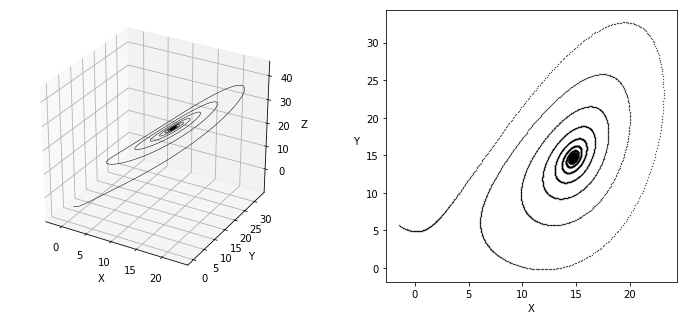

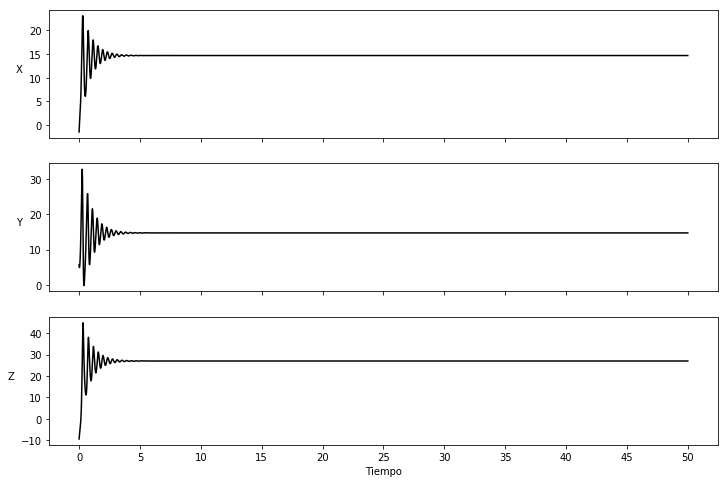

In [5]:
# Definir el rango de integración, asumiendo t0 = 0
max_time = 50.0
num_steps = 1000 # Divisiones del rango

t, x_t = solve_lorenz(beta=8.0)
plot_system(x_t)

Valores altos de $\rho$, por otra parte, conduce a otro tipo de atractor regular, como se muestra a continuación: 

Condiciones iniciales = (-5.486105884599258, -4.965244093342255, 4.191147825133331)


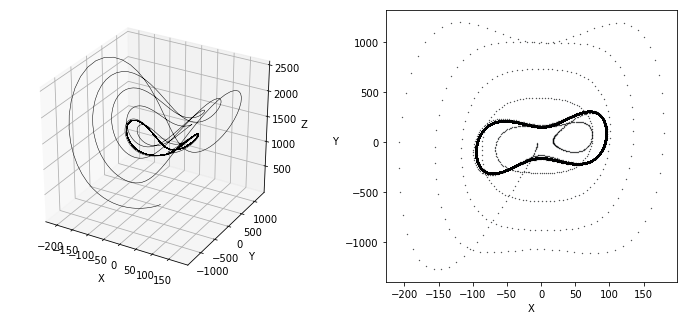

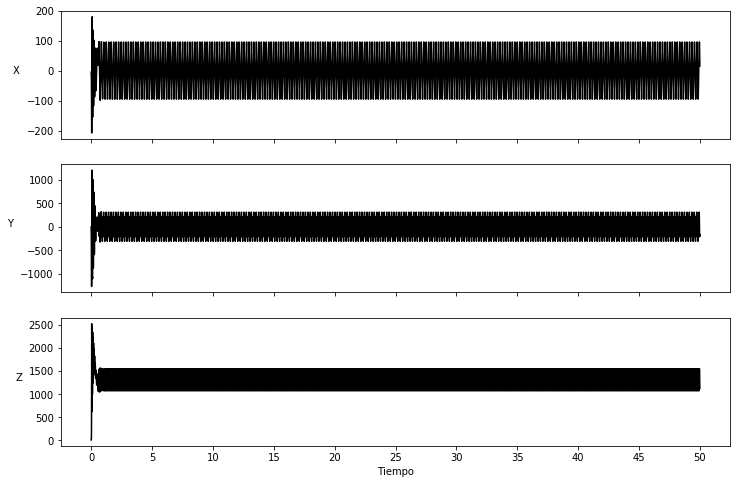

In [6]:
# Definir el rango de integración, asumiendo t0 = 0
max_time = 50.0
num_steps = 1000 # Divisiones del rango

t, x_t = solve_lorenz(rho=1280)
plot_system(x_t)

En este caso, se trata de un ciclo límite, esto es, una trayectoria cerrada en el espacio de fases tal que al menos otra trayectoria no cerrada tiende en espiral hacia ella (este fenómeno sólo ocurre en sistemas no lineales). Si todas las trayectorias, como en este caso, tienden en espiral hacia el ciclo límite, se dice que es un atractor (regular) o un ciclo límite estable.

Sin embargo, ciertos valores de los parámetros, en particular los descritos anteriormente ($\sigma=10, \rho=28$ y $\beta=8/3$), conducen a un tipo de sistema más interesante. En este caso, Lorenz observó que, aunque el sistema aún muestra comportamientos estables, la presencia de cambios muy pequeños en las condiciones iniciales (específicamente la precisión utilizada en los valores utilizados en la simulación), resulta en una alta variación en el comportamiento del sistema dinámico. Ejemplos de este comportamiento pueden observarse en la siguiente figura, donde se utilizaron los valores de parámetros típicos en diferentes simulaciones y sólo se cambiaron las condiciones iniciales. Este tipo de comportamiento se llama *atractor extraño*:

![](images/lorenz05.png)

El atractor extraño de Lorenz es un caso de comportamiento cuasi periódico: las trayectorias parecen oscilar de manera estable en torno a un conjunto de puntos, de manera aparentemente aleatoria. Es debido a este comportamiento que el sistema de Lorenz es considerado como caótico. El caos, en este caso, es debido a la dependencia sensible en las condiciones iniciales del sistema de Lorenz, lo cual tiene como consecuencia que, en la práctica, sea imposible poder predecir los estados del sistema a largo plazo. 

El sistema de Lorenz es muy interesante para probar algoritmos de reconcimiento de patrones porque, si bien muestra un comportamiento difícil de predecir, el sistema es completamente causal: su comportamiento, aunque complejo, está generado por un conjunto bien definido de ecuaciones y, por lo tanto, siempre que se utilice el mismo conjunto de parámetros y valores iniciales en una simulación, se obtendrá el mismo resultado. El sistema de Lorenz permite generar, entonces, datos sintéticos de prueba con un comportamiento complejo, pero con una estructura determinísta. Un dato se califica como "sintético" si es generados de manera algorítmica y no como resultado de la observación de un sistema natural.

A continuación, la simulación estándar mostrando el atractor extraño:

Condiciones iniciales = (-7.378843789426323, 1.8164545395803273, -6.888552969402186)


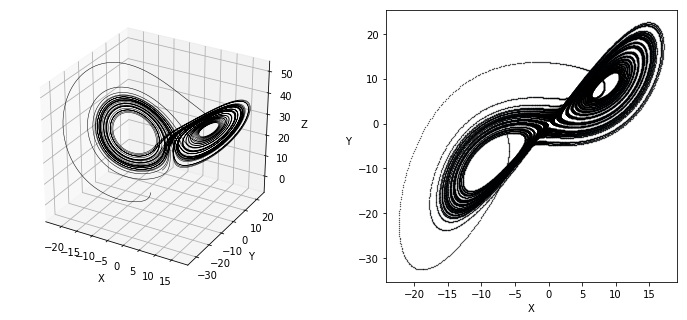

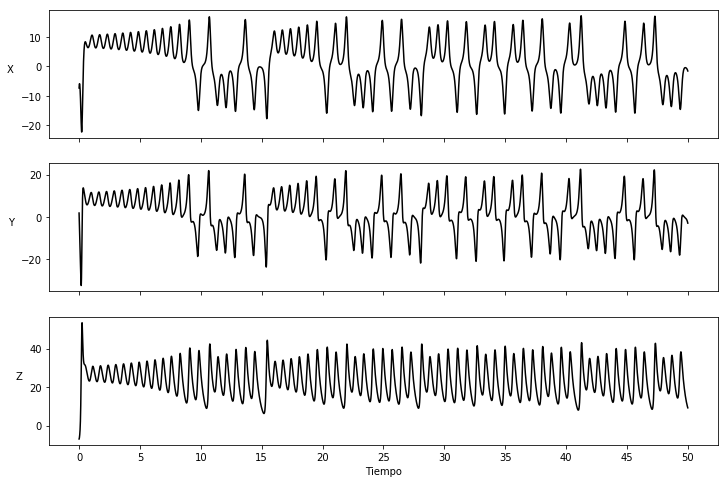

In [7]:
# Definir el rango de integración, asumiendo t0 = 0
max_time = 50.0
num_steps = 1000 # Divisiones del rango

t, x_t = solve_lorenz()
plot_system(x_t)

<hr style="border-width: 3px;">

# Encuesta de desarrolladores 2018 de Stack Overflow

### Motivación
La comunidad de desarrolladores de software está conformada por personas singulares, resultado de su dedicación a una actividad que puede considerarse como la más nueva en la historia de la humanidad y que requiere de cualidades especiales.

![](images/geek.jpg)

La singularidad de esta comunidad se refleja no sólo en aspectos de imagen personal y de interacción social (los aspectos más evidentos y estereotipados), sino particuarmente en sus motivadores. Estas características de un grupo de personas que en el nivel profesional representan el núcleo de la nueva economía ha dado lugar al syrgimiento de una nueva disciplina en administración de recursos humanos, la llamada [*Administración de Geeks*](https://www.fastcompany.com/37145/how-manage-geeks). 

Comprender los puntos de vista de los desarrolladores, sus actividades cotidianas y sus planes de desarrollo, pueden permitir optimizar el desarrollo de la profesión y abre posibilidades para definir un mercado bien segmentado para esta comunidad.

### 1. Comprensión del negocio

### <span style="color:#313f9e; font-weight: bold;">Descripción del negocio:</span>

<a href="https://stackoverflow.com"><img src="images/stack_overflow_logo.png"/></a>  

Stack Overflow es un  sitio web privado, el sitio principal de la Stack Exchange Network creado en 2008 por Jeff Atwood y Joel Spolsky. Es uno de los sitios más importantes de referencia para dudas específicas de programación, basada en asesoría de pares (las respuestas son proporcionadas por otros programadores).

La empresa ofrece también servicios comerciales a través de *Stack Overflow Business*.


### <span style="color:#313f9e; font-weight: bold;">Objetivos del negocio:</span>

Stack Overflow fue creado como una herramienta social para programadores con el objetivo de evitar estancamientos al momento de programar. El sitio debía crear una especie de biblioteca
activa de preguntas y respuestas técnicas a problemas específicos, inusuales o complejos, sobre cualquier área de programación.

Un segundo reto de la empresa fue desarrollar un [modelo de negocios](https://web.stanford.edu/class/ee204/Publications/Finding%20a%20Growth%20Business%20Model%20at%20Stack%20Overflow.pdf) que permitiera monetizar la creciente popularidad del sitio.

El modelo de negocios de Stack Overflow consta actualmente de tres componentes principales ([aquí](https://stackoverflow.blog/2016/11/15/how-we-make-money-at-stack-overflow-2016-edition/) otra referencia):
<ul>
<li> Servicios de [reclutamiento de recursos humanos](https://www.stackoverflowbusiness.com/talent). Stack Overflow maneja listas de empleos, identificación de perfiles, asesoría para reclutamientos, etc. </li> 
<li> Servicios de [mercadotecnia/ads y reputación](https://www.stackoverflowbusiness.com/engagement). Publicidad "no intrusiva".  </li>
<li> [Servicios de comunidad privada (Stack Overflow Enterprise)](https://stackoverflow.com/enterprise). Versión privada de Stack Overflow, donde los expertos son internos a la empresa. </li>
</ul> 

El éxito de la empresa se mide a través de los siguientes criterios:
<ul>
<li>Ofrecer al programador un ambiente amistoso donde buscar soluciones a problemas específicos, posiblemente no bien documentados o solicitar el apoyo de otros programadores y obtener respuestas en tiempos muy cortos. </li> 
<li>Ofrecer a los reclutadores, información confiable de posibles candidatos para cubrir un determinado perfil.</li>
<li>Ofrecer a las empresas canales de publicidad para productos que resulten atractivos a los usuarios a los que se les presenta cada anuncio, evitando incomodarle con publicidada no deseada. </li>
</ul> 


### <span style="color:#313f9e; font-weight: bold;">Evaluación de la situación:</span>

Al día de hoy, Stack Overflow ha alcanzado alrededor de 9 millones de usuarios registrados ([actualizar aquí](https://sostats.github.io)) y más de 16 millones de preguntas que han generado alrededor de 25 millones de respuestas. Sin embargo, desde 2011, Stack Overflow lleva a cabo una [encuesta](https://insights.stackoverflow.com/survey) entre los desarrolladores registrados en el sitio, que en la edición 2018 alcanzó más de 100,000 aplicaciones. La integración de estas dos fuentes de datos (actividad y encuesta) son suficientemente interesantes para generar información que permita mejorar las ofertas de Stack Overflow.

Los principales riesgos en esta iniciativa de minería sobre los datos disponibles para Stack Overflow, con los posibles planes de contingencia son:

<table style="width: 95%">
  <tr>
    <th style="text-align: left; font-size: 110%; border: 1px solid #555;">Riesgos</th>
    <th style="text-align: left; font-size: 110%; border: 1px solid #555;">Medidas de control</th>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Datos insuficientes para llegar a conclusiones útiles</td>
    <td style="text-align: left; border: 1px solid #555;"><ol>
    <li>Se establecerán objetivos de diferente alcance a fin de tener al menos resultados parciales.</li>
    <li>Se identificarán tópicos a incluir en la siguiente encuesta, a fin de repetir el 
        ejercició de minería y complementar las conclusiones.</li>
    <li>Se generarán indicadores adicionales utilizando datos de fuentes adicionales como el del <a href="https://www.tiobe.com/tiobe-index/">Índice Tiobe</a> sobre popularidad de lenguajes de programación y la información de empleos en <a href="https://www.indeed.com/q-Data-Scientist-jobs.html">indeed.com</a>.</li>
    </ol></td>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Provocar cansancio en los usuarios que están respondiendo la encuesta</td>
    <td style="text-align: left; border: 1px solid #555;"><ol>
    <li>Se compartirán los resultados preliminares con los usuarios que respondieron la 
        encuesta.</li>
    <li>Se incluirá un elemento de reputación adicional para los usuarios que respondieron 
        la encuesta.</li>
    </ol></td>
  </tr>
</table>



### <span style="color:#313f9e; font-weight: bold;">Objetivos de la minería de datos:</span>

Se establecen objetivos del proyecto de minería de datos alineados con los objetivos de negocio:

<table style="width: 95%">
  <tr>
    <th style="text-align: left; font-size: 110%; border: 1px solid #555;">Objetivos de negocio</th>
    <th style="text-align: left; font-size: 110%; border: 1px solid #555;">Objetivos de minería de datos</th>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Ofrecer servicios de reclutamiento de recursos humanos</td>
    <td style="text-align: left; border: 1px solid #555;"><ol>
    <li>Identificar las principales áreas de experiencia de los usuarios, a fin de generar
        un catálogo de perfiles de recursos humanos.</li>
    <li>Generar una herramienta interna para evaluación de los perfiles de usuarios, a 
        partir de sus preguntas y respuestas y de la calidad de las respuestas. Evaluar 
        polaridad de respuestas y comentarios.</li>
    <li>Detectar las necesidades de capacitación de los usuarios, en términos de las consultas 
        realizadas. Generar información a los reclutadores sobre potencial de usuarios y 
        necesidades de capacitación para ocupar un perfil laboral.</li>
    <li>Generar una herramienta interna para planificación de cursos y opciones de 
        capacitación que se puedan ofrecer a los reclutadores registrados.</li>
    </ol></td>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Ofrecer servicios de mercadotecnia/ads "no intrusiva" y reputación</td>
    <td style="text-align: left; border: 1px solid #555;"><ol>
    <li>Identificar intereses de productos y servicios como pueden ser ambientes de 
        desarrollo, equipo de cómputo o cursos de capacitación.</li>
    <li>Identificar grupos de usuarios dados sus perfiles, las respuestas en la encuesta y las 
        conversaciones en las que participan.</li>
    </ol></td>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Ofrecer servicios de comunidad privada</td>
    <td style="text-align: left; border: 1px solid #555;"><ol>
    <li>Desarrollar un módulo inteligente para detectar necesidades de capacitación, en 
        términos de las consultas realizadas. Utilizar identificación de tópicos, además de 
        las etiquetas específicas utilizadas.</li>
    <li>Desarrollo de un módulo inteligente para evaluación de los perfiles de usuarios, a 
        partir de sus preguntas y respuestas y de la calidad de las respuestas. Evaluar 
        polaridad de respuestas y comentarios.</li>
    <li>Módulo para la aplicación de encuestas derivadas de las encuestas para 
        desarrolladores, aplicadas a nivel interno.</li>
    </ol></td>
  </tr>
</table>


</div>
</div>

<hr style="border-width: 3px;">

# Reporte de homicidios en Estados Unidos

## Motivación
El sitio de la Oficina de Naciones Unidas contra la Droga y el Delito muestra muestra una tabla con datos sobre [homicidios intencionales a nivel mundial por año](dataunodc.un.org/crime/intentional-homicide-victims). El reporte más reciente es del año 2016, con registros para 94 países. De acuerdo con esos datos (parciales), durante el 2016 ocurrieron 285,828 asesinatos registrados en el mundo, con aproximadamente 9 asesinatos por cada 100,000 habitantes (22.2 si nos limitamos a países de América Latina). Estos números (entre los que no se incluyen las personas desaparecidas) son preocupantes y dejan de manifiesto la necesidad de contar con mejores herramientas para la prevención de la violencia. 

Las técnicas de minería de datos han venido llamando la atención como una forma de identificar patrones en la actividad criminal. Un proyecto interesante, por los resultados obtenidos y por los datos que ofrece de manera libre es el [Murder Accountability Project](http://www.murderdata.org).


## 1. Comprensión del negocio

### <span style="color:#313f9e; font-weight: bold;">Descripción del negocio:</span>

<a href="http://www.murderdata.org"><img src="images/NewHeader2.png"/></a>  

La iniciativa *Murder Accountability Project* fue fundada por Thomas K. Hargrove, un periodista de investigación retirado y ex corresponsal de la Casa Blanca, en 2015, con el objetivo de rastrear homicidios no resueltos en todo el país. Siendo corresponsal nacional para el servicio noticioso Scripps Howard, Hargrove desarrolló un algoritmo para la identificación de grupos de asesinatos con una probabilidad elevada de contener asesinatos en serie, utilizando datos de homicidios del FBI. Mediante este algoritmo, Hargrove identificó un posible patrón en 15 estrangulaciones no resueltas en Gary, Indiana, que apuntaba a la presencia de un asesino serial. Esta hipótesis se corroboró en 2014 con el arresto del feminicida serial Darren Deon Vann, quien confesó y condujo a la recuperación de los cuerpos de seis víctimas de estrangulación previamente reportadas como desaparecidas.



### <span style="color:#313f9e; font-weight: bold;">Objetivos del negocio:</span>

En el sitio de *Murder Accountability Project* se lee que fue creado con el objetivo primario de educar a los estadounidenses sobre la importancia de contabilizar con precisión los homicidios no resueltos dentro de los Estados Unidos [22], sin embargo, a partir de la lectura de su misión (sección [Why We Exist](http://www.murderdata.org/p/about.html)), pueden deducirse los siguientes objetivos específicos:

<ul>
<li> Obtener y publicar información del gobierno federal y los gobiernos estatales y locales sobre homicidios no resueltos. </li>
<li> Ofrecer al público una herramienta para determinar con qué frecuencia los departamentos de policía de su comunidad resuelven un homicidio mediante un arresto. </li>
<li> Ofrecer al público una herramienta para buscar patrones en la ocurrencia de tipos específicos de homicidios y con qué frecuencia la policía identificó al agresor. </li>
<li> Ofrecer a los investigadores de homicidios una herramienta para probar teorías sobre asesinatos en su comunidad. </li>
<li> Ayudar a identificar a aquellas comunidades que no reportan al FBI información importante para ayudar a explicar los homicidios no resueltos. </li>
</ul> 
<br>

El éxito de la empresa se mide a través de los siguientes criterios:
<ul>
<li>Reducción de la tasa de asesinatos no resueltos en las agencias de justicia. Reducción del tiempo de identificación del criminal. </li>
<li>Reducción de los recursos utilizados para aclarar un crimen. </li>
<li>Reducción de la multiplicidad de víctimas por criminal. </li>
</ul> 


### <span style="color:#313f9e; font-weight: bold;">Evaluación de la situación:</span>

El *Murder Accountability Project* cuenta con un grupo de especialistas que dirigen las funciones del proyecto. En la página Web del proyexto se describen los antecedentes profesionales de 9 investigadores policiacos retirados, periodistas, criminólogos y otros expertos en diversos aspectos del homicidio que conforman el consejo de directores.

El sitio web del *Murder Accountability Project* ofrece acceso público a dos conjuntos de datos mantenidos por la Oficina Federal de Investigaciones (FBI - *Federal Bureau of Investigation*): el *Uniform Crime Report* con datos desde 1965 hasta la fecha y el *Supplementary Homicide Report* que tiene datos desde 1976 hasta la fecha. Así mismo, se encuentran publicados datos acerca de más de 27,000 homicidios no denunciados al Departamento de Justicia, disponibles a través de la Ley de libertad de información que entró en vigor en 1967. De esta manera, este sitio ofrece la base de datos sobre asesinatos más completa en Estados Unidos y es caso excepcional a nivel mundial.

Los principales riesgos en esta iniciativa de minería sobre los datos disponibles en la base de datos del *Murder Accountability Project*, con los posibles planes de contingencia:

<table style="width: 95%">
  <tr>
    <th style="text-align: left; font-size: 110%; border: 1px solid #555;">Riesgos</th>
    <th style="text-align: left; font-size: 110%; border: 1px solid #555;">Medidas de control</th>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Datos insuficientes para llegar a conclusiones útiles</td>
    <td style="text-align: left; border: 1px solid #555;"><ol>
    <li>Se establecerán objetivos de diferente alcance a fin de ir obteniendo resultados    
        parciales conforme se enriquece la base de datos.</li>
    <li>Se hará énfasis en la preparación de los datos, particularmente con la integración de 
        nuevas fuentes de datos.</li>
    </ol></td>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Identificación de pistas falsas</td>
    <td style="text-align: left; border: 1px solid #555;"><ol>
    <li>Se buscará generar modelos híbridos, basados en diferentes técnicas de modelado, para 
        cada fase de minería de datos, así como integración con modelos tradicionales.</li>
    <li>Se desarrollará un modelo de confianza, basado en la pertinencia de las predicciones.
        </li>
    </ol></td>
  </tr>
</table>



### <span style="color:#313f9e; font-weight: bold;">Objetivos de la minería de datos:</span>
Se proponen los siguientes objetivos de minería, de acuerdo a los objetivos del negocio:

<table style="width: 95%">
  <tr>
    <th style="text-align: left; font-size: 110%; border: 1px solid #555;">Objetivos de negocio</th>
    <th style="text-align: left; font-size: 110%; border: 1px solid #555;">Objetivos de minería de datos</th>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Obtener y publicar información del gobierno federal, y los gobiernos estatales y 
        locales sobre homicidios no resueltos.</td>
    <td style="text-align: left; border: 1px solid #555;">Desarrollar un esquema de visualización de datos, que facilite la búsqueda y 
        despliegue de conjuntos de datos específicos.</td>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Ofrecer al público una herramienta para determinar con qué frecuencia los 
        departamentos de policía de su comunidad resuelven un homicidio mediante un arresto.
        </td>
    <td style="text-align: left; border: 1px solid #555;">Desarrollo de un modelo de interfaz para mostrar de forma gráfica los resultados de 
        cada departamento policial contra los casos que les competen y una comparación de 
        eficacia con los demás departementos de justicia del país. </td>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Ofrecer al público una herramienta para buscar patrones en la ocurrencia de tipos 
        específicos de homicidios y con qué frecuencia la policía identificó al agresor.</td>
    <td style="text-align: left; border: 1px solid #555;">Desarrollar una plataforma de búsqueda y visualización de casos de homicidos de 
        acuerdo a diferentes tipologías, con indicadores de éxito en la resolución del caso, 
        globalmente y por comunidad.</td>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Ofrecer a los investigadores de homicidios una herramienta para probar teorías sobre 
        asesinatos en su comunidad.</td>
    <td style="text-align: left; border: 1px solid #555;"><ol>
    <li>Analizar la viabilidad de una variedad amplia de técnicas de preparación de datos, 
        reconocimiento de patrones y visualización y seleccionar las mejores para cada fase de 
        análisis.</li>
    <li>Desarrollo de un modelo variable de caso de uso para el análisis de crímenes no 
        resueltos que facliten al investigador el planteamiento de un caso y el uso de las 
        herramientas de análisis provistas en el sitio. </li>
    <li>Desarrollar una metodología sugerida para secuencia de aplicación de técnicas de 
        preparación de datos, reconocimiento de patrones y visualización de resultados, 
        utilizando las herramientas provistas en el sitio.</li>
    <li>Desarrollar una biblioteca de algoritmos para las diferentes fases de análisis de 
        casos en diferentes plataformas, como SPSS, R y Python.</li>
    <li>Desarrollar una plataforma de software en Python/Django o Java/Grails para la 
        realización de procesos de minería de datos sobre casos específicos utilizando 
        recursos locales y validación en línea de los resultados.</li>
    </ol></td>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Ayudar a identificar a aquellas comunidades que no reportan al FBI información 
        importante para ayudar a explicar los homicidios no resueltos.</td>
    <td style="text-align: left; border: 1px solid #555;"><ol>
        <li>Desarrollar un módulo que muestre el historial de reportes de cada comunidad en 
            comparación con las denuncias de desapariciones y con los resultados de resolución 
            de casos antes sin resolver, vinculados a la comunidad.</li>
        <li>Desarrollar un módulo tipo "Salón de la fama" de las comunidades con mejores y 
            peores prácticas de información.</li>
        </ol></td>
  </tr>
</table>

<hr style="border-width: 3px;">

# Base de datos de productos alimenticios de marca del USDA

### Motivación
La cada vez más clara relación entre los altos contenidos de grasas saturadas, azúcar y sal en el desarrollo de enfermedades crónicas, principal causa de muerte prematura y discapacidad en el mundo, han provocado un creciente interés del consumidor por la composición precisa de los productos alimenticios, particularmente en los productos distribuidos de forma masiva.

![](images/food.jpg)

Esta preocupación quedó de manifiesto en la “[Declaración de Roma sobre la Nutrición](http://www.fao.org/3/a-ml542s.pdf)”, presentada durante la Segunda Conferencia Internacional sobre Nutrición (CIN2) en octubre de 2014, en la que se establece:

>13.g) “Reafirmamos que... Los datos e indicadores sobre nutrición, así como la capacidad de todos los países y el apoyo prestado a estos, en especial a los países en desarrollo, para la recopilación y el análisis de datos, deben mejorarse a fin de contribuir a una mayor eficacia en la vigilancia de la nutrición, la formulación de políticas y la rendición de cuenta”

Esta creciente atención a la nutrición ha venido moldeando los mercados y las políticas alimentarias en los países de altos ingresos, lo mismo para ofrecer alimentos de mayor calidad, como una información más completa de los ingredientes utilizados y las condiciones en que son elaborados los alimentos que llegan al mercado. La información sobre la composición de alimentos permiten al consumidor hacer una mejor elección. Para este fin, se creó el Grupo de Monitoreo de Alimentos. Establecida en 2010, esta iniciativa tiene el objetivo de comparar y rastrear objetivamente la composición nutricional de los alimentos procesados en diversos países del mundo. La elección hecha por los consumidores a partir de la información disponible de la composición de los alimentos, por otra parte, es de gran valor para la industria alimentaria, toda vez que le permite a los productores ajustar su oferta a las demandas del consumidor. La iniciativa más importante para recabar información sobre composición de alimentos, disponible de forma libre es la Base de datos de productos alimenticios de marca del USDA, en Estados Unidos. Debido a su disponibilidad, será esta base de datos la que se empleará como caso de estudio.


## 1. Comprensión del negocio

### <span style="color:#313f9e; font-weight: bold;">Descripción del negocio:</span>

<a href="https://data.nal.usda.gov/dataset/usda-branded-food-products-database"><img src="images/usda.jpeg"/></a>  

La iniciativa [*Una asociación para la salud pública: Base de datos de productos alimenticios de marca del USDA*](https://data.nal.usda.gov/dataset/usda-branded-food-products-database) es una asociación público-privada que reune a las siguientes entidades:

* El Departamento de Agricultura de los Estados Unidos ([USDA](https://www.ars.usda.gov)), 
* El Instituto Internacional de Ciencias de la Vida ([ILSI](http://ilsina.org)),
* El Instituto Conjunto de Seguridad Alimentaria y Nutrición Aplicada de la Universidad de Maryland ([JIFSAN](https://jifsan.umd.edu)),
* La empresa de soluciones para cadenas de suministro [GS1 U](https://www.gs1us.org),
* La empresa [1WorldSync](https://www.1worldsync.com) proveedora de soluciones de certificación de contenido de productos y
* La empresa de sistemas de información en la nube [Label Insight](https://www.labelinsight. com).

Esta base de datos fué lanzada el 16 de septiembre de 2016. En adelante, nos referiremos a esta iniciativa como *USDA-BFPDB* y consideraremos a la USDA como la empresa cliente.


### <span style="color:#313f9e; font-weight: bold;">Objetivos del negocio:</span>

El objetivo de la *USDA-BFPDB* es mejorar la salud pública y el intercambio de datos abiertos mediante la expansión de la Base de Datos Nacional de Nutrientes con la composición de nutrientes e información de ingredientes en los productos alimenticios de marca proporcionados por la industria alimentaria. 

La *USDA-BFPDB* se constituyó en torno a los 12 principios identificados por el Instituto Internacional de Ciencias de la Vida (*ILSI*) que se presentan a continuación:

<ol>
<li>Tener un objetivo claramente definido y alcanzable para mejorar la salud del público.</li>
<li>Asegurar que los objetivos satisfagan las necesidades de los socios interesados, con una línea de base claramente definida para monitorear el progreso y medir el éxito.</li>
<li>Seleccionar mediciones científicas objetivas capaces de proporcionar un terreno común para los objetivos de investigación tanto del sector público como del privado.</li>
<li>Articular una declaración clara del trabajo, las reglas y los roles, responsabilidades y rendición de cuentas de los socios, para generar confianza, transparencia y respeto mutuo como principios operativos básicos.</li>
<li>Teniendo en cuenta la importancia del equilibrio, asegúra que todos los miembros posean niveles adecuados de poder de negociación.</li>
<li>Minimizar el conflicto de intereses al reclutar un número suficiente de socios para mitigar la influencia de cualquier miembro individual y ampliar las perspectivas y la experiencia del sector privado.</li>
<li>Adoptar preguntas de investigación y metodologías establecidas por socios sin interés financiero en ellos, idealmente en el espacio precompetitivo.</li>
<li>Involucrar a socios que estén de acuerdo con preguntas de investigación específicas y financiables que serán abordadas por la asociación.</li>
<li>Reclutar a socios que estén comprometidos con los objetivos a largo plazo, así como a compartir el financiamiento y los datos de investigación.</li>
<li>Junto con el gobierno y el sector privado, incluyeir a académicos y otros miembros de la sociedad civil como socios.</li>
<li>Ser flexible y asegurar el mantenimiento de comunicaciones transparentes.</li>
<li>Considerar un coordinador externo para garantizar la igualdad en la mesa, aclarar las reglas, establecer pautas operativas y especificar los acuerdos de financiamiento. </li>
</ol> 


### <span style="color:#313f9e; font-weight: bold;">Evaluación de la situación:</span>

La base de datos de la *USDA-BFPDB* (o simplemente *BFPDB*) es una de las bases de datos de alimentos públicas más importantes a nivel mundial y representa en Estados Unidos la fuente principal de datos de composición de alimentos para gobierno, investigadores e industria en el sector alimentario. Proporciona acceso público a la composición de nutrientes e información de ingredientes en alimentos de marca y almacena los datos de marca proporcionados voluntariamente por la industria alimentaria. Las empresas participantes utilizan la Red Global de Sincronización de Datos para enviar los datos de sus productos, ya sea a *Label Insight* o a *1WorldSync*. Cada empresa de alimentos que suministra datos para la *BFPDB* son responsables de la veracidad y estructura de estos. 

A continuación se muestran los principales riesgos en una iniciativa de minería sobre los datos disponibles en la base de datos de la *USDA-BFPDB*, con los posibles planes de contingencia:


<table style="width: 95%">
  <tr>
    <th style="text-align: left; font-size: 110%; border: 1px solid #555;">Riesgos</th>
    <th style="text-align: left; font-size: 110%; border: 1px solid #555;">Medidas de control</th>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Datos insuficientes para llegar a conclusiones útiles</td>
    <td style="text-align: left; border: 1px solid #555;"><ol>
    <li>Se establecerán objetivos de diferente alcance a fin de ir obteniendo resultados
        parciales conforme se enriquece la base de datos. </li>
    <li>Se hará énfasis en la preparación de los datos, particularmente en la definición de
        casos y la integración de nuevas fuentes de datos.</li>
    <li>Se incluirán otras fuentes de datos, como los proporcionados por *INFOODS-FAO* 
        (*International Network of Food Data Systems*).</li>
    </ol></td>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Obtención de resultados no alineados a los estándares de la industria</td>
    <td style="text-align: left; border: 1px solid #555;">Se conformará un grupo de asesores para guiar la selección de técnicas que arrojen los
        resultados más adecuados a las prácticas de nutriólogos, médicos y productores de 
        alimentos.</td>
  </tr>
</table>


### <span style="color:#313f9e; font-weight: bold;">Objetivos de la minería de datos:</span>

En este caso, sin unos objetivos específicos claros, se utilizará el objetivo general y los 12 principios de *ILSI* para proponer al cliente los objetivos de minería de datos. Estos objetivos se muestran en la tabla a continuación:

<table style="width: 95%">
  <tr>
    <th style="text-align: left; font-size: 110%; border: 1px solid #555;">Objetivos de negocio</th>
    <th style="text-align: left; font-size: 110%; border: 1px solid #555;">Objetivos de minería de datos</th>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #555;">Mejorar la salud pública y el intercambio de datos abiertos.</td>
    <td style="text-align: left; border: 1px solid #555;"><ol>
    <li>Desarrollar un algoritmo para identificación de clases de alimentos dependiendo de sus 
        ingredientes.</li>
	<li>Desarrollar un algoritmo de clasificación de alimentos de marca basado en 
        restricciones de salud para las principales condiciones físicas, como diabetes,
        obesidad, enfermedades cardiácas, etc.</li>
	<li>Desarrollar un modelo de caso para especificar tipos de alimentos en base a diversas 
        restricciones.</li>
	<li>Desarrollar un algoritmo para estandarización de descripciones de alimentos.</li>
	<li>Desarrollar un algoritmo para predicción de demanda de alimentos a partir de los 
        contenidos en la *BFPDB* y un monitoreo permanente de comentarios en redes sociales 
        </li>
    </ol></td>
  </tr>
</table>

## Conclusiones

La metodología CRISP-DM señala como primera fase de un proyecto de minería de datos la comprensión del negocio, una tarea que es importante para enfocar los objetivos de las tareas y métodos a utilizar durante el desarrollo del proyecto, de manera que los resultados agreguen un valor concreto a la actividad de la organización que, desde su perspectiva del negocio. 